In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge

In [60]:
x, y = make_regression(n_samples=1000, n_features=1, noise=0.1)

In [61]:
lr = Ridge(alpha=1)

In [62]:
model = lr.fit(x, y)

In [63]:
y_pred = model.predict(x)

In [64]:
y_bar = np.mean(y)
x_bar = np.mean(x)

In [65]:
model.coef_

array([86.41113228])

In [ ]:
# M = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar) ** 2) + alpha

In [66]:
m = []
alpha = []
for _ in range(1, 100):
    m.append(np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar) ** 2 + _))
    alpha.append(_)

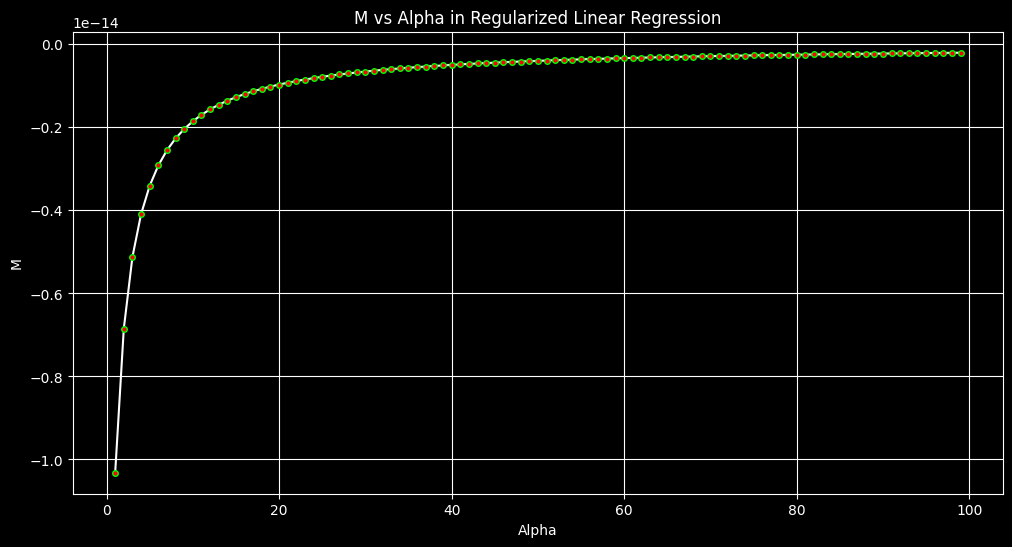

In [88]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

plt.figure(figsize=(12.0, 6.0))
plt.plot(
    alpha,
    m,
    marker=".",
    linestyle="-",
    markerfacecolor="red",
    markeredgecolor="lime",
    markersize=8,
    color="white",
)

# Ensure annotation coordinates exist within the plotted data range
plt.annotate(
    text="As alpha increases, M decreases",
    xy=(10, -0.5),  # Point to annotate (adjust indices as needed)
    xytext=(50, -0.4),  # Text position
    arrowprops=dict(arrowstyle="->", color="yellow"),  # Optional arrow
    fontsize=12,
    color="yellow",
)

plt.grid(True)
plt.xlabel("Alpha")
plt.ylabel("M")
plt.title("M vs Alpha in Regularized Linear Regression")
plt.show()

In [98]:
# Effect of Alpha on Cost Function

CostFunction = []

In [103]:
model.coef_

array([86.41113228])

In [99]:
for _ in range(1, 100):
    CostFunction.append(np.sum(np.square(y - y_pred)) + alpha * model.coef_**2)

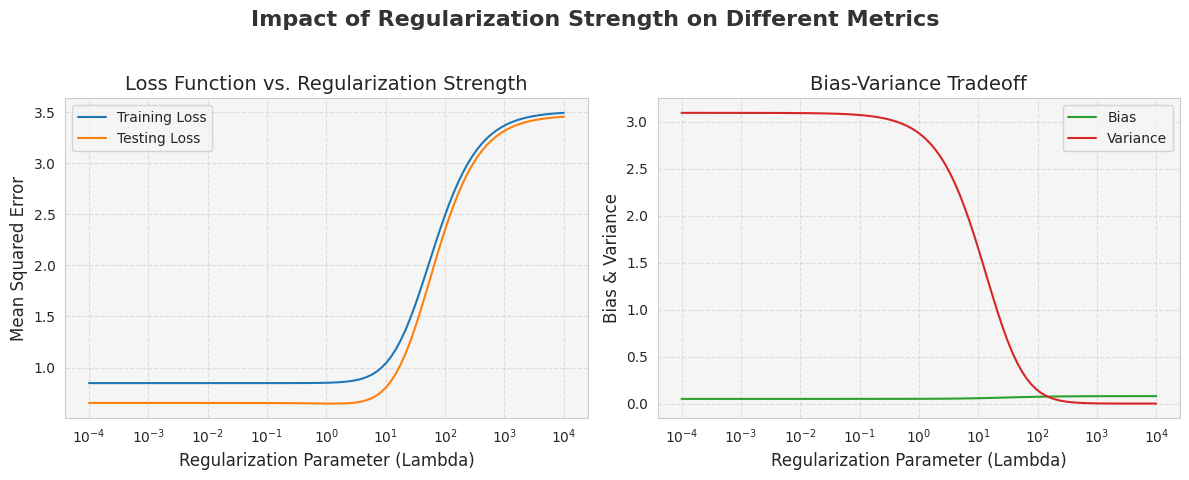

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set Seaborn style for better visuals
sns.set_style("whitegrid")
plt.rcParams.update(
    {"axes.facecolor": "#f5f5f5", "grid.alpha": 0.6, "grid.linestyle": "--"}
)

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define range of regularization parameters
lambdas = np.logspace(-4, 4, 100)
train_loss = []
test_loss = []
bias = []
variance = []

# Compute loss, bias, and variance for each lambda
for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Compute predictions
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)

    # Compute loss
    train_loss.append(mean_squared_error(y_train, y_train_pred))
    test_loss.append(mean_squared_error(y_test, y_test_pred))

    # Compute bias and variance
    bias.append((y_test - y_test_pred).mean() ** 2)
    variance.append(np.var(y_test_pred))

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle(
    "Impact of Regularization Strength on Different Metrics",
    fontsize=16,
    fontweight="bold",
    color="#333333",
)

# Plot the loss function
axes[0].plot(
    lambdas,
    train_loss,
    label="Training Loss",
    linestyle="-",
    color="#1f77b4",
)
axes[0].plot(lambdas, test_loss, label="Testing Loss", linestyle="-", color="#ff7f0e")
axes[0].set_xscale("log")
axes[0].set_xlabel("Regularization Parameter (Lambda)", fontsize=12)
axes[0].set_ylabel("Mean Squared Error", fontsize=12)
axes[0].set_title("Loss Function vs. Regularization Strength", fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.6)

# Plot bias-variance tradeoff
axes[1].plot(lambdas, bias, label="Bias", linestyle="-", color="#2ca02c")
axes[1].plot(lambdas, variance, label="Variance", linestyle="-", color="#d62728")
axes[1].set_xscale("log")
axes[1].set_xlabel("Regularization Parameter (Lambda)", fontsize=12)
axes[1].set_ylabel("Bias & Variance", fontsize=12)
axes[1].set_title("Bias-Variance Tradeoff", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()
plt.savefig("RidgeRegression.png", dpi=300)